In [1]:
library(tidyverse)
library(janitor)
library(readr)
library(dplyr)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(RColorBrewer)
library(bit64)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:dplyr’:

    symdiff


The following object is masked from ‘package:base’:

    xor


Attaching package bit64

package:bit64 (c) 2

## Đọc dữ liệu

In [2]:
daily <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(daily)
str(daily)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

In [4]:
head(sleep)
str(sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


## Convert lại tên cột

In [5]:
daily <- daily %>% clean_names(case = "snake")
sleep <- sleep %>% clean_names(case = "snake")

In [6]:
head(daily)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [7]:
head(sleep)

id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


## Convert lại ngày giờ

In [8]:
daily <- daily %>%
    mutate(activity_date = mdy(activity_date))

sleep <- sleep %>%
    mutate(sleep_day = mdy_hms(sleep_day))

daily$id <- as.integer64(daily$id)
sleep$id <- as.integer64(sleep$id)


In [9]:
str(daily)

tibble [940 × 15] (S3: tbl_df/tbl/data.frame)
 $ id                        :integer64 [1:940] 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366 ... 
 $ activity_date             : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ total_steps               : num [1:940] 13162 10735 10460 9762 12669 ...
 $ total_distance            : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_

## Xử lý null

In [10]:
daily %>% summarise_all(~sum(is.na(.)))
sleep %>% summarise_all(~sum(is.na(.)))

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<int>,<int>,<int>,<int>,<int>
0,0,0,0,0


## Xử lý trùng

In [11]:
cat("Number of duplicate daily: ", sum(duplicated(daily)), "\n")
cat("Number of duplicate sleep: ", sum(duplicated(sleep)), "\n")

Number of duplicate daily:  0 
Number of duplicate sleep:  3 


In [12]:
daily <- unique(daily)
sleep <- unique(sleep)

## Lấy ra các thứ trong tuần

In [13]:
daily <- daily %>%
  mutate(week_day = weekdays(activity_date))

sleep <- sleep %>%
  mutate(week_day = weekdays(sleep_day))

In [14]:
head(daily)
head(sleep)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day
<int64>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,week_day
<int64>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,1,327,346,Tuesday
1503960366,2016-04-13,2,384,407,Wednesday
1503960366,2016-04-15,1,412,442,Friday
1503960366,2016-04-16,2,340,367,Saturday
1503960366,2016-04-17,1,700,712,Sunday
1503960366,2016-04-19,1,304,320,Tuesday


## Tính tổng thời gian hoạt động trong ngày và thời gian bắt đầu vào giấc ngủ

In [15]:
daily <- daily %>%
  mutate(total_active_minute = very_active_minutes + 
                               fairly_active_minutes + 
                               lightly_active_minutes)

sleep <- sleep %>%
  mutate(time_to_sleep = total_time_in_bed - total_minutes_asleep)


## Join 2 bảng theo id, sleepday và weekday

In [16]:
daily_sleep <- inner_join(
  daily,
  sleep,
  by = c("id", "week_day", "activity_date" = "sleep_day")
)

In [17]:
head(daily_sleep)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,week_day,total_active_minute,total_sleep_records,total_minutes_asleep,total_time_in_bed,time_to_sleep
<int64>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,13,328,728,1985,Tuesday,366,1,327,346,19
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,19,217,776,1797,Wednesday,257,2,384,407,23
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,34,209,726,1745,Friday,272,1,412,442,30
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,10,221,773,1863,Saturday,267,2,340,367,27
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,20,164,539,1728,Sunday,222,1,700,712,12
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,31,264,775,2035,Tuesday,345,1,304,320,16


In [18]:
str(daily_sleep)

tibble [410 × 21] (S3: tbl_df/tbl/data.frame)
 $ id                        :integer64 [1:410] 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366 1503960366 ... 
 $ activity_date             : POSIXct[1:410], format: "2016-04-12" "2016-04-13" ...
 $ total_steps               : num [1:410] 13162 10735 9762 12669 9705 ...
 $ total_distance            : num [1:410] 8.5 6.97 6.28 8.16 6.48 ...
 $ tracker_distance          : num [1:410] 8.5 6.97 6.28 8.16 6.48 ...
 $ logged_activities_distance: num [1:410] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:410] 1.88 1.57 2.14 2.71 3.19 ...
 $ moderately_active_distance: num [1:410] 0.55 0.69 1.26 0.41 0.78 ...
 $ light_active_distance     : num [1:410] 6.06 4.71 2.83 5.04 2.51 ...
 $ sedentary_active_distance : num [1:410] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:410] 25 21 29 36 38 50 28 19 41 39 ...
 $ fairly_active_minutes     : num [1:410] 13 19 34 10 20 31 12 8 21 5 ...
 $ lightl

## Xử lý ngoại lệ

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


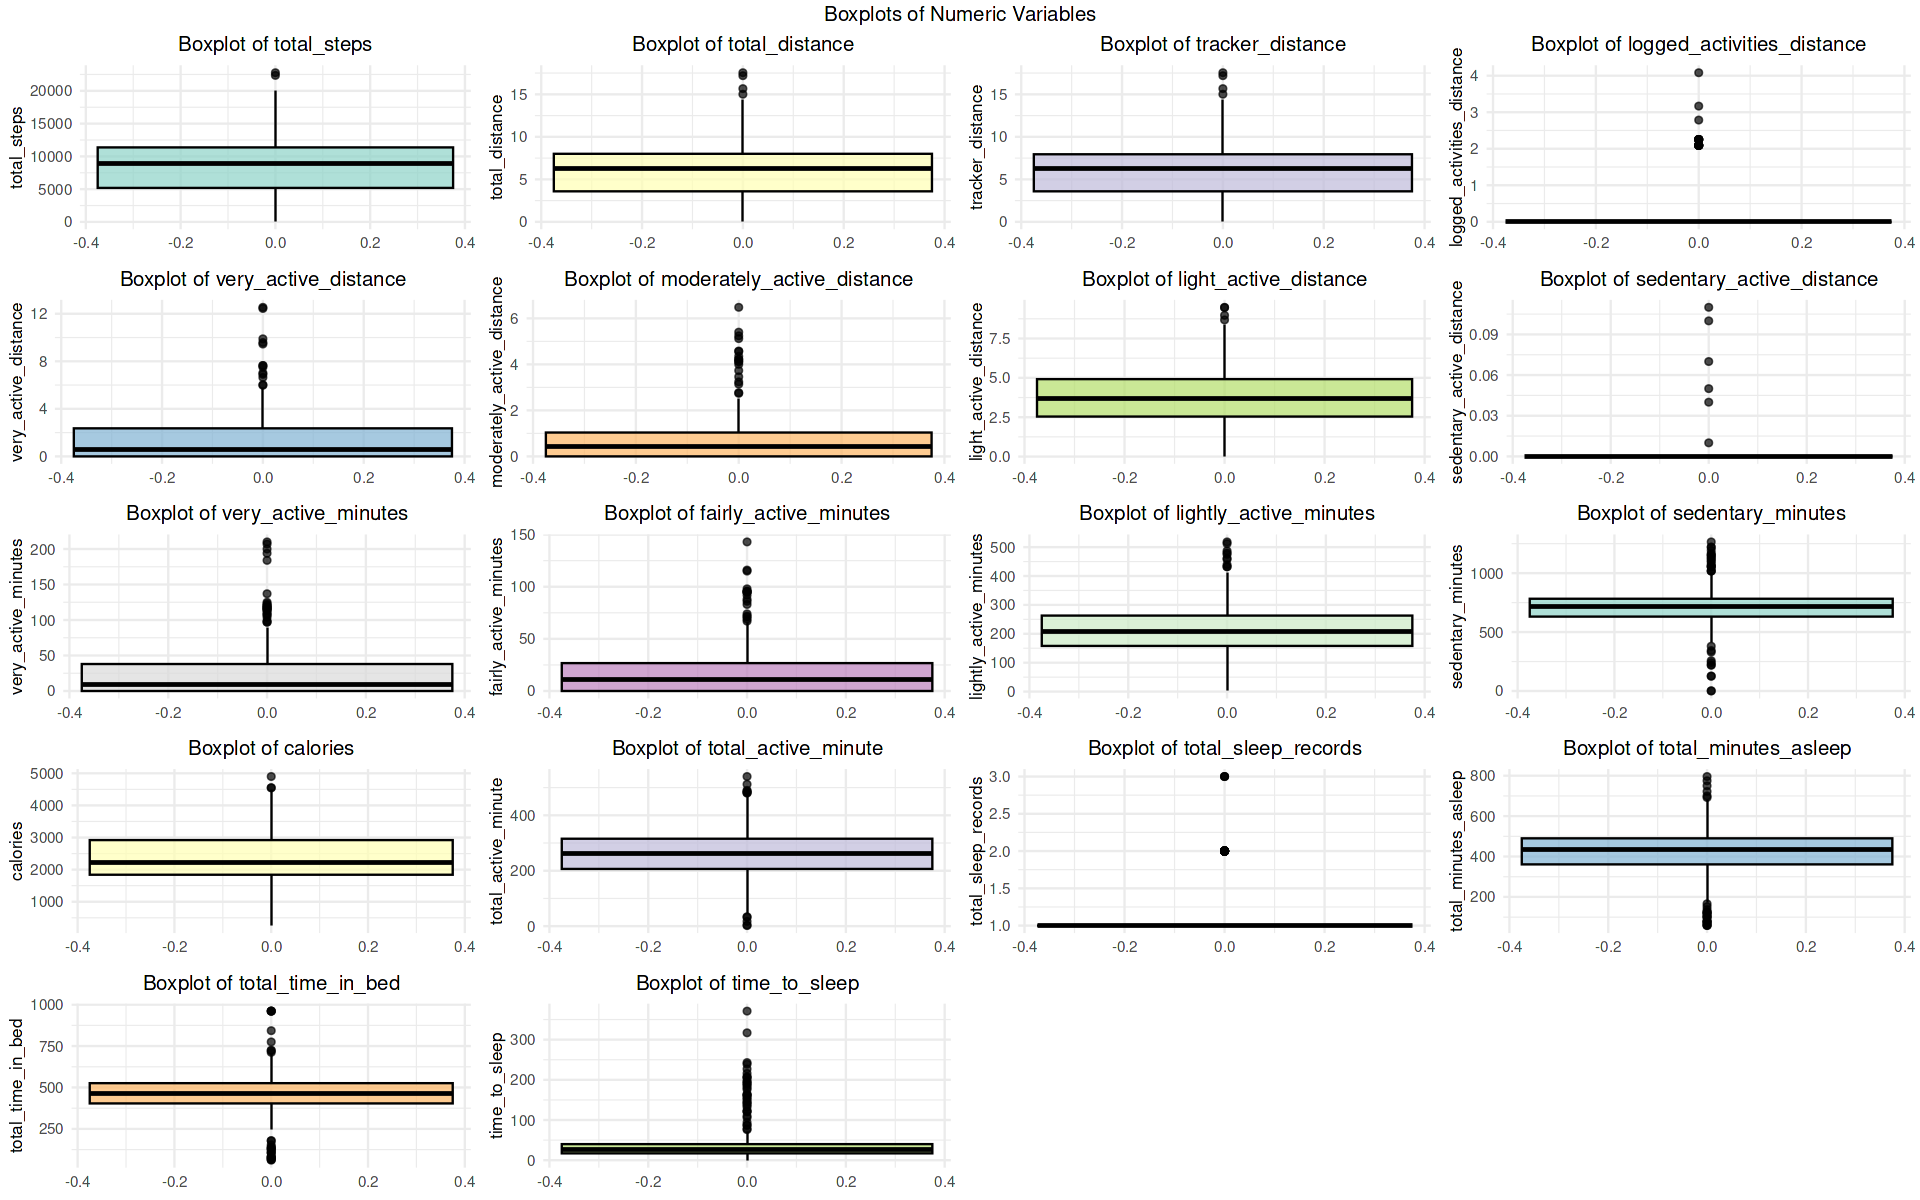

In [19]:
numeric_cols <- daily_sleep %>%
  select(where(is.numeric)) %>%
  select(-id) %>%
  names()

handle_outliers <- function(df, col) {
  Q1 <- quantile(df[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(df[[col]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_limit <- Q1 - (IQR * 1.5)
  upper_limit <- Q3 + (IQR * 1.5)
  
  df[[col]][df[[col]] > upper_limit] <- upper_limit
  df[[col]][df[[col]] < lower_limit] <- lower_limit
  
  return(df)
}

daily_sleep_cleaned <- daily_sleep

for(col in numeric_cols) {
  daily_sleep_cleaned <- handle_outliers(daily_sleep_cleaned, col)
}
options(repr.plot.width=16, repr.plot.height=10)
n_cols <- 4
n_rows <- ceiling(length(numeric_cols) / n_cols)

plot_list <- list()

colors <- brewer.pal(min(length(numeric_cols), 11), "Set3")
if(length(numeric_cols) > 11) {
  colors <- rep(colors, ceiling(length(numeric_cols) / 11))
}

for(i in seq_along(numeric_cols)) {
  col <- numeric_cols[i]
  
  # Tạo boxplot cho từng cột
  p <- ggplot(daily_sleep, aes_string(y = col)) +
    geom_boxplot(fill = colors[i], alpha = 0.7, color = "black") +
    labs(title = paste("Boxplot of", col),
         y = col) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, hjust = 0.5),
          axis.title = element_text(size = 10))
  
  plot_list[[i]] <- p
}

grid.arrange(grobs = plot_list, 
             ncol = n_cols, 
             nrow = n_rows,
             top = "Boxplots of Numeric Variables",
            )

Hầu hết các biến đều có nhiều outliers, cho thấy có những ngày người dùng hoạt động rất khác biệt so với mức trung bình, điều này là bình thường trong dữ liệu hoạt động hàng ngày.

## Kiểm tra độ tương quan giữa các biến bằng biểu đồ heatmap

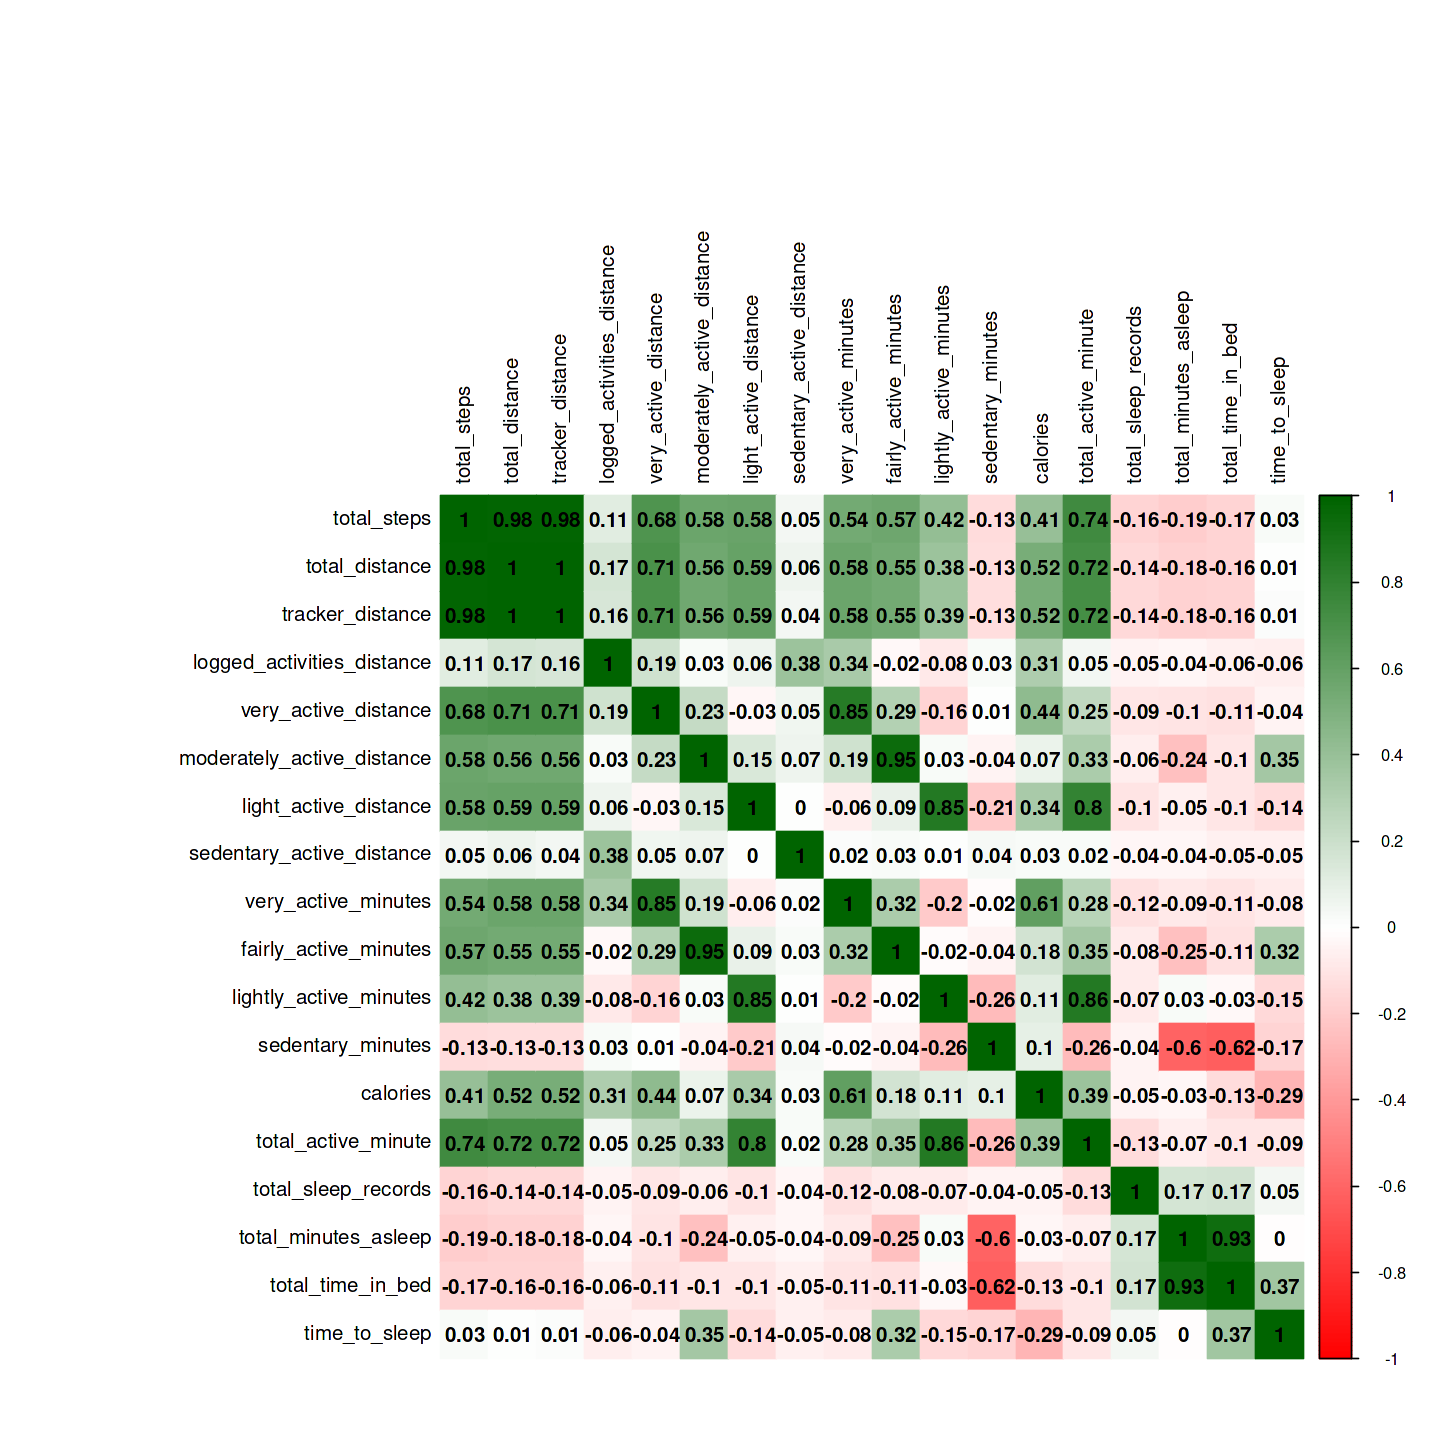

In [20]:
options(repr.plot.width = 12, repr.plot.height = 12)
numeric_cols <- daily_sleep %>%
  select(where(is.numeric)) %>%
  select(-id)

col_palette <- colorRampPalette(c("red", "white", "darkgreen"))(200)
corr <- cor(numeric_cols, use = "pairwise.complete.obs")
corrplot(corr, method = "color", type = "full",
         tl.col = "black", tl.srt = 90,
         addCoef.col = "black",
         col = col_palette)  


* total_minutes_asleep và total_time_in_bed: Tương quan rất cao (≈0.93). Người dành nhiều thời gian trên giường thường cũng có nhiều phút ngủ.
* time_to_sleep hầu như không liên quan đến các biến khác (tương quan gần 0).
* Giấc ngủ và vận động trong dữ liệu này dường như độc lập.

Giấc ngủ chất lượng
* Tốn <= 30 phút để chìm vào giấc ngủ sau khi nằm lên giường.
* Có hơn 85% thời gian bạn nằm trên giường thật sự ngủ.
* https://dripcare.vn/tin-tuc/thong-tin-y-khoa/the-nao-la-mot-giac-ngu-chat-luong

In [21]:
daily_sleep <- daily_sleep %>%
  mutate(
    sleep_quality = ifelse(
      time_to_sleep <= 30 & (total_minutes_asleep / total_time_in_bed) > 0.85,
      "Good",
      "Bad"
    )
  )


In [22]:
number_sleep_quality <- table(daily_sleep$sleep_quality)
print(number_sleep_quality)



 Bad Good 
 160  250 


In [23]:
head(daily_sleep)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,lightly_active_minutes,sedentary_minutes,calories,week_day,total_active_minute,total_sleep_records,total_minutes_asleep,total_time_in_bed,time_to_sleep,sleep_quality
<int64>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,328,728,1985,Tuesday,366,1,327,346,19,Good
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,217,776,1797,Wednesday,257,2,384,407,23,Good
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,209,726,1745,Friday,272,1,412,442,30,Good
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,221,773,1863,Saturday,267,2,340,367,27,Good
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,164,539,1728,Sunday,222,1,700,712,12,Good
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,264,775,2035,Tuesday,345,1,304,320,16,Good
